# Figure 5, benchmarking Snudda

The benchmarking jobs were run on Tegner at PDC/KTH.

Two benchmarks were done. One where the size of the network was kept constant (n=500000) while the number of CPU cores was increased. The other kept the number of CPU cores constant (k=24) and increased the network size.

In the current directory is a ```benchmark_jobs``` folder, which contains the job scripts used to run the benchmarks (triggered by the shell scripts). 

## SIZE
```Tegner_benchmark-size.job``` and ```Tegner_benchmark-size.sh``` was used for the varying size runs, here the shell script was edited (```SIMSIZE``` at the top of the file was changed) for each run.

## NODES
```Tegner_benchmark-k.job``` where ```k``` is 0.25,0.5,1,2,3,4,5,10 depending on how many nodes were used. All but the two first used ```Tegner_benchmark.sh```, while the two first used ```Tegner_benchmark_quarter.sh``` and ```Tegner_benchmark_half.sh``` (since the main shell script named the network directory based on number of nodes).

After running these scripts the ```benchmark_log.json``` files were copied to new folders on a laptop for analysis (see ```SIZE``` and ```NODES``` sub-directories).

The code below shows how the plotting was done using these benchmark files. We originally did it using shell scripts, but in the interest of easy readability this Jupyter notebook version was created.

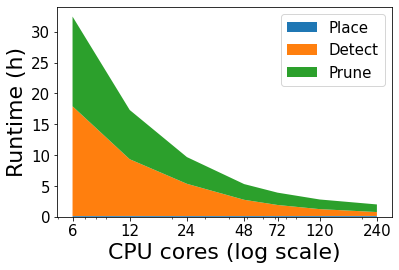

In [1]:
import os
import glob
from snudda.plotting.plot_node_benchmark import PlotNodeBenchmark
node_dir = glob.glob(os.path.join("NODES","node-*"))
pnb = PlotNodeBenchmark(network_path_list=node_dir)
pnb.plot_data()

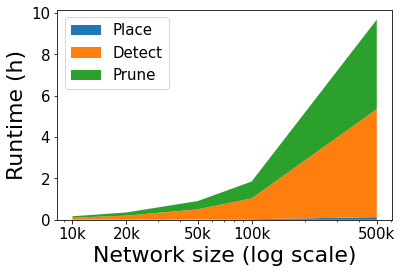

In [2]:
from snudda.plotting.plot_size_benchmark import PlotSizeBenchmark

network_sizes = [10000, 20000, 50000, 100000, 500000]
network_dir = [f"SIZE/size-{s}" for s in network_sizes]

psb = PlotSizeBenchmark(network_dir, network_sizes)
psb.plot_data()